0       40.900749  0.818182   ...  0.000000   12.000000
1     3202.467416   0.909091  ...   0.222222         12
2     2495.148862   1.000000  ...   0.000000         12
3     1666.670542   0.636364  ...   0.000000         12
4      817.714335   1.000000  ...   0.000000         12
5     1809.828751   1.000000  ...   0.000000         12
...           ...        ...  ...        ...        ...
8945    28.493517   1.000000  ...   0.500000          6
8946    19.183215   1.000000  ...   0.000000          6
8947    23.398673   0.833333  ...   0.250000          6
8948    13.457564   0.833333  ...   0.250000          6
8949   372.708075   0.666667  ...   0.000000          6

[8949 rows x 17 columns]

Sample of feature vector var___________points_______feteched:


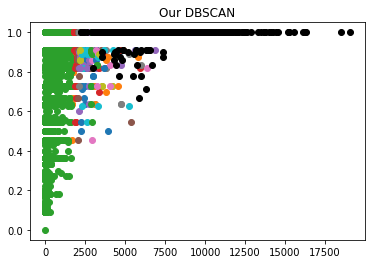

In [5]:
import pandas as imported_lib_pandas

import numpy as imported_lib_np

import sys

import matplotlib.pyplot as imported_lib_plot

import random

from numpy import square, sqrt

from sklearn.cluster import DBSCAN




imported_d_f = imported_lib_pandas.read_csv("/content/data.csv")

imported_d_f.drop(['CUST_ID'], axis=1)

del imported_d_f['CUST_ID']

new_header = imported_d_f.iloc[0]
imported_d_f = imported_d_f[1:]
imported_d_f.columns = new_header 



print(imported_d_f)
x = imported_d_f.iloc[:,0].tolist()
y = imported_d_f.iloc[:,1].tolist()



print("\nSample of feature vector var___________points_______feteched:")
var___________points_______feteched = list(zip(x, y))
var___________points_______feteched[:5]
points_x = [i[0] for i in var___________points_______feteched]
points_y = [i[1] for i in var___________points_______feteched]




def method________Our______DB__________SCAN(Dataset, eps, MinPts, Metric = "Euclidean", Noise = "Yes"):
    noise = []
    visited = [] 
    Clusters = [] 
    

    
    for var________points in Dataset: 
        
        
        if var________points in visited:
            continue
        
        
        var_____________neighbour_points = method_________Range____________Query(Dataset,var________points,eps, Metric)
        
        
        
        if len(var_____________neighbour_points) < MinPts:
            noise.append(var________points)
            continue
            
        else:
            Clusters,visited,noise = method______Expand_________________Cluster(Dataset, var________points, visited, noise, Clusters, var_____________neighbour_points, eps, MinPts)
            
    
    for cluster in Clusters:
        imported_lib_plot.scatter([i[0] for i in cluster],[i[1] for i in cluster],cmap="prism")
    
    
      
    if Noise.lower() == "yes":
        imported_lib_plot.scatter([i[0] for i in noise],[i[1] for i in noise],color = "black")
        imported_lib_plot.title("Our DBSCAN")
        imported_lib_plot.show()
    elif Noise.lower() == "no":
        imported_lib_plot.title("Our DBSCAN")
        imported_lib_plot.show()
    else:
        sys.exit("Error: Pass in either \"Yes\" or \"No\" for noise.")
    
    return Clusters
    
    


       
def method______Expand_________________Cluster(Dataset, Point, visited, noise, Clusters, var_____________neighbour_points, eps, MinPts):
    var________________temp_Cluster = [] 
    var________________temp_Cluster.append(Point)

    
    for neighbour_point in var_____________neighbour_points:  
        if neighbour_point not in visited:
            if neighbour_point in noise:                 
                
                noise.remove(neighbour_point)
            visited.append(neighbour_point)
            next_neighbour_points = method_________Range____________Query(Dataset,neighbour_point,MinPts, Metric = "Euclidean")
            if len(next_neighbour_points) >= MinPts:
                for i in next_neighbour_points:
                    var_____________neighbour_points.append(i)

                    
            in_cluster = 0
            for clust in Clusters:
                if neighbour_point in clust:
                    in_cluster = 1
                    break
            if in_cluster is 0:
                var________________temp_Cluster.append(neighbour_point)
                

    Clusters.append(var________________temp_Cluster)       
    return Clusters, visited, noise       
    
    
    
    

def method_________Range____________Query(Dataset, CorePoint, eps, Metric):
    var_____________neighbour_points = []  
    
    
    for var________points in Dataset:
        
        if Metric.lower() == "euclidean":      




            var__________distance = sqrt(((CorePoint[0]-var________points[0])**2)+((CorePoint[1]-var________points[1])**2))
            
        elif Metric.lower() == "manhattan":
            
            
            var__________distance = (abs(CorePoint[0] - var________points[0])) + (abs(CorePoint[1] - var________points[1]))
            
        else:
            
            #Error
            sys.exit("Error: Pass in either \"Euclidean\" or \"Manhattan\" for noise.")
            
            
        
        if var__________distance <= eps:
            var_____________neighbour_points.append(var________points)
    
    
    return var_____________neighbour_points



cluster1 = method________Our______DB__________SCAN(var___________points_______feteched, 4, 4, Metric = "Euclidean", Noise = "Yes")

